In [1]:
import scipy.io.wavfile as wav
import pandas as pd
import numpy as np
from statistics import stdev
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import itertools

In [2]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# Creating features from audio files

In [3]:
header = 'filename rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [4]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [5]:
Instruments = 'flu pia tru org gac voi cel cla gel sax vio'.split()

for i in Instruments:
    for filename in os.listdir(f'./../IRMAS/IRMAS-TrainingData/{i}'):
        songname = f'./../IRMAS/IRMAS-TrainingData/{i}/{filename}'
        y, sr = librosa.load(songname, sr =44100)
        rms = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {i}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [6]:
df = pd.read_csv('data.csv')
df.head()

,filename,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,[flu][cla]0441__1.wav,0.149752,2097.888099,2489.946539,3917.463313,0.044588,-183.342606,150.484238,-45.797676,31.572205,...,12.865310,5.979919,-0.760616,-2.864177,-10.078252,-9.153670,-5.919430,1.270639,-5.099973,flu
1,[flu][pop_roc]0372__1.wav,0.070092,1788.342987,3053.350599,3598.705395,0.024457,-266.117035,168.074860,8.713345,38.584534,...,0.733319,-3.077334,-3.865694,-7.703886,-7.980325,-0.265409,-0.590245,2.773574,-1.158271,flu
2,[flu][pop_roc]0489__3.wav,0.075266,1415.090142,1338.522972,2574.007601,0.044043,-260.943909,235.551620,-72.608337,1.650667,...,-4.480639,-4.898223,1.072633,8.016642,8.928833,3.030757,-6.311554,-13.654664,-10.805024,flu
3,061__[flu][dru][pop_roc]0419__2.wav,0.157308,1457.059728,2070.808325,2434.665329,0.035720,-223.190750,188.077667,-17.081148,22.657728,...,11.541116,8.014239,-9.074387,-9.779533,-8.943732,-7.005507,-2.292251,-2.062893,1.445740,flu
4,[flu][cla]0373__1.wav,0.048835,1903.336677,2381.898288,2342.879012,0.047959,-469.845367,92.393463,-23.503510,-9.021843,...,-23.929064,-29.581631,-23.973606,11.314720,24.038225,16.351347,-0.176797,-3.863950,-2.982665,flu


In [7]:
features = df[df.columns[2:26]]

# PCA Analysis

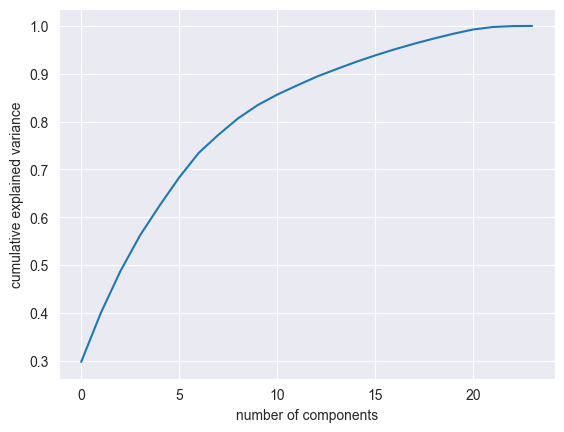

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
X = scale(features)
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [9]:
# Dropping unnecessary columns
df = df.drop(['filename'],axis=1)
df1 = shuffle(df)
df1

,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
5694,0.160654,964.508037,1851.689186,1582.316301,0.012594,-254.076889,193.542603,0.428575,30.463936,22.587532,...,-3.746806,-2.328181,0.494689,3.845208,2.928276,-0.164095,-4.254563,-4.800524,-4.758358,sax
2091,0.109054,2291.019249,3660.213111,4922.872677,0.031578,-220.574921,158.177414,23.652430,29.333588,-1.247739,...,-1.384036,1.445288,2.732749,3.208701,-0.439823,1.093129,-0.704565,-0.705401,2.167240,org
1508,0.147089,2240.969857,3057.602210,4654.081767,0.041658,-132.884506,168.411255,-25.963684,26.048063,-20.297085,...,-6.984018,-4.121765,-6.562927,-3.120099,-5.496145,-1.994466,-4.870272,-1.784952,-4.472381,tru
2066,0.112679,2084.913847,2584.236460,4530.951753,0.043621,-183.206924,168.900726,-36.920696,56.407967,-7.090919,...,-1.988940,-1.541323,-8.694127,-5.006235,-10.176612,-4.465590,-6.108335,0.258859,-3.882875,org
2297,0.157691,2200.533545,3008.022828,4751.022751,0.038073,-177.700745,157.159561,-15.563142,48.489380,-0.886647,...,9.487401,2.763548,-8.103801,-5.340158,-3.460940,2.096370,-1.694877,2.942290,-3.218041,org
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509,0.148707,1285.596427,1055.971553,2418.536212,0.049776,-248.543106,219.274841,-26.747669,-41.812969,45.303642,...,-1.960748,2.995636,-0.224939,-1.081118,-2.933203,-4.028528,-2.959171,-4.399548,-4.157790,voi
5562,0.181923,1662.837846,1832.347492,3672.200961,0.041428,-181.783600,202.653015,-64.445396,59.696957,10.533446,...,-5.883662,-3.985052,1.265345,-11.177389,-4.879364,-2.287852,-1.590169,3.036427,0.551071,sax
5361,0.081471,2602.764509,2840.135014,5360.686761,0.057099,-224.186600,151.357346,-40.721092,46.475250,9.316933,...,-3.863802,0.843674,4.199200,7.683326,-5.630725,3.373670,-3.219400,1.996735,-4.466708,gel
3273,0.146688,2645.177731,2616.481490,5047.166649,0.075152,-118.726425,165.646225,-78.172165,36.036537,-27.012089,...,-6.344146,8.566794,3.924300,-12.352905,-2.862337,2.572831,-7.036984,-5.735296,-11.505237,voi


In [10]:
instru_list = df1.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(instru_list)

scaler = StandardScaler()
X = scaler.fit_transform(np.array(df1.iloc[:, :-1], dtype = float))

In [11]:
y

array([ 7,  5,  8, ...,  4, 10,  0])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVM

In [13]:
svclassifier = SVC(probability=True, kernel='rbf', C = 10.0, gamma=0.1)
svclassifier.fit(X_train, y_train)

SVC(C=10.0, gamma=0.1, probability=True)

## Save the Model


In [14]:
import pickle

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(svclassifier, file)
    
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)
    
# Save the mapping (label encoder) for use in the software
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(encoder, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_train, y_train)
print("Validation score: {0:.2f} %".format(100 * score))


Validation score: 99.87 %


## Analyze model performance

In [15]:
# predicted_labels = svclassifier.predict(X_test)
Ypredict = pickle_model.predict(X_test)

In [16]:
print("Recall: ", recall_score(y_test, Ypredict,average=None))
print("Precision: ", precision_score(y_test, Ypredict,average=None))
print("F1-Score: ", f1_score(y_test, Ypredict, average=None))
print("Accuracy: %.2f  ," % accuracy_score(y_test, Ypredict,normalize=True), accuracy_score(y_test, Ypredict,normalize=False) )

print("Number of samples:",y_test.shape[0])
print(confusion_matrix(y_test, Ypredict))

Recall:  [0.76190476 0.61616162 0.51851852 0.81617647 0.71052632 0.76984127
 0.71830986 0.5971223  0.72173913 0.58035714 0.70322581]
Precision:  [0.82051282 0.57009346 0.525      0.70700637 0.6835443  0.7238806
 0.74452555 0.68032787 0.78301887 0.59633028 0.7124183 ]
F1-Score:  [0.79012346 0.59223301 0.52173913 0.75767918 0.69677419 0.74615385
 0.7311828  0.63601533 0.75113122 0.58823529 0.70779221]
Accuracy: 0.69  , 925.0
Number of samples: 1341
[[ 64   2   1   6   3   0   1   2   0   4   1]
 [  3  61   7   4   1   1   4   3   6   6   3]
 [  2   6  42   3   1  10   1   3   3   4   6]
 [  0   1   3 111   2   0   6   4   0   4   5]
 [  2   2   4   5 108   5   1   5   3   5  12]
 [  1   4   6   3   4  97   0   0   2   5   4]
 [  1   7   3   7   9   5 102   3   1   3   1]
 [  2  11   4   2   6   5  10  83   5   8   3]
 [  0   5   4   1   1   5   3   5  83   3   5]
 [  3   5   2   7  12   2   3   6   3  65   4]
 [  0   3   4   8  11   4   6   8   0   2 109]]


## Confusion Matrix Visualization

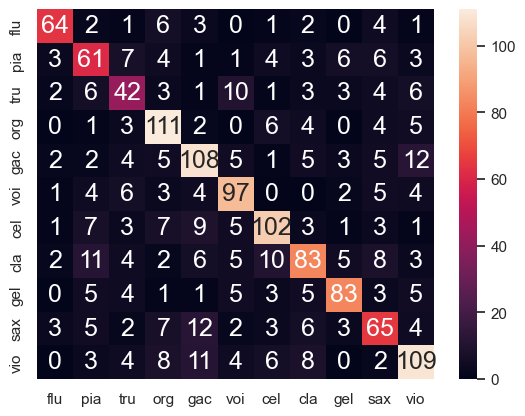

In [17]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt  
df_cm = pd.DataFrame(confusion_matrix(y_test, Ypredict),index=["flu", "pia", "tru", "org", "gac", "voi", "cel", "cla", "gel", "sax", "vio"], columns=["flu", "pia", "tru", "org", "gac", "voi", "cel", "cla", "gel", "sax", "vio"])
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 18},fmt='g')# font size

plt.show()